# Recurrent Neural Network, 순환 신경망


### RNN 실습, 다음 수 예측( Many to One)
* RNN 구조를 직접 구현해서 다음 숫자 예측하는 실습    

#### 입출력 데이타 준비

In [1]:
import tensorflow as tf
import numpy as np

step_size = 4
batch_size = 5

x = [ [[i/10] for i in range(j, j+step_size)] for j in range(batch_size)]
y = [[ (i+step_size) /10] for i in range(batch_size)]
display("x", x, "y",y)

'x'

[[[0.0], [0.1], [0.2], [0.3]],
 [[0.1], [0.2], [0.3], [0.4]],
 [[0.2], [0.3], [0.4], [0.5]],
 [[0.3], [0.4], [0.5], [0.6]],
 [[0.4], [0.5], [0.6], [0.7]]]

'y'

[[0.4], [0.5], [0.6], [0.7], [0.8]]

#### TF Keras Model을 이용한 다음 수 예측 실습

In [3]:
element_size = 1
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=[step_size, element_size]),
    tf.keras.layers.Dense(element_size)
])
model.summary()
model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=1000, verbose=0)
pred = model.predict(x)
print(f'prediction: {tf.squeeze(pred)}')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
prediction: [0.39952955 0.49973935 0.60083854 0.701282   0.7985467 ]


### Vanila RNN 실습2, Many to Many


#### 입출력 데이타 준비

In [83]:
import tensorflow as tf
import numpy as np

step_size = 4
batch_size = 5

x = [ [[i/10] for i in range(j, j+step_size)] for j in range(batch_size)]
y = [ [[i/10] for i in range(j+1, j+step_size+1)] for j in range(batch_size)]
display("x", x, "y",y)

'x'

[[[0.0], [0.1], [0.2], [0.3]],
 [[0.1], [0.2], [0.3], [0.4]],
 [[0.2], [0.3], [0.4], [0.5]],
 [[0.3], [0.4], [0.5], [0.6]],
 [[0.4], [0.5], [0.6], [0.7]]]

'y'

[[[0.1], [0.2], [0.3], [0.4]],
 [[0.2], [0.3], [0.4], [0.5]],
 [[0.3], [0.4], [0.5], [0.6]],
 [[0.4], [0.5], [0.6], [0.7]],
 [[0.5], [0.6], [0.7], [0.8]]]

#### TF Keras를 이용한 실습

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=[step_size, element_size], return_sequences=True),
    tf.keras.layers.Dense(element_size)
])
model.summary()
model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=1000, verbose=0)
pred = model.predict(x)
print(f'prediction: {tf.squeeze(pred)}')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, 4, 10)             120       
_________________________________________________________________
dense_7 (Dense)              (None, 4, 1)              11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
prediction: [[0.2834577  0.21673763 0.27802214 0.38358343]
 [0.2944024  0.31542468 0.39945063 0.5002965 ]
 [0.30445662 0.4112241  0.51065373 0.60875326]
 [0.3132205  0.5031215  0.60719633 0.7082859 ]
 [0.32035115 0.5903807  0.68736416 0.7984788 ]]


### Text 데이타 실습, One-hot Encoding


#### 입출력 데이타 준비

In [96]:
import tensorflow as tf
import numpy as np

sentence = "hihello"

voca = set(sentence) #unique charters
char2idx = {c:i for i,c in enumerate(voca)}
idx2char = {i:c for i, c in enumerate(voca)}
print(f'sentence:{sentence}')
print(f'char2idx:{char2idx}, idx2char:{idx2char}')

x = sentence[:-1] #"hihell"
y = sentence[1:] #"ihello"
print(f'x:{x}, y:{y}')

n_class = len(voca)  #example size
n_time_steps = len(x) #input sequence
hidden_size = n_class #output size

''' convert char to integer '''
x_idx = [char2idx[c] for c in x]
y_idx = [char2idx[c] for c in y]
print(f"x_idx:{x_idx}, y_idx:{y_idx}")

''' one-hot encoding'''
x_enc =tf.keras.utils.to_categorical(x_idx, num_classes=n_class)
x_enc = np.expand_dims(x_enc, axis=0)

y_enc = tf.keras.utils.to_categorical(y_idx, num_classes=n_class)
y_enc = np.expand_dims(y_enc, axis=0)
print("x_enc:", x_enc, x_enc.shape, )
print("y_enc:", y_enc, y_enc.shape)

sentence:hihello
char2idx:{'e': 0, 'l': 1, 'i': 2, 'o': 3, 'h': 4}, idx2char:{0: 'e', 1: 'l', 2: 'i', 3: 'o', 4: 'h'}
x:hihell, y:ihello
x_idx:[4, 2, 4, 0, 1, 1], y_idx:[2, 4, 0, 1, 1, 3]
x_enc: [[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0.]]] (1, 6, 5)
y_enc: [[[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0.]]] (1, 6, 5)


#### LSTM을 이용한 모델 학습

In [100]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(hidden_size, input_shape=(n_time_steps, n_class), return_sequences=True))
model.add(tf.keras.layers.Dense(hidden_size))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

n_epochs = 1000
history = model.fit(x_enc, np.reshape(y_idx, (1,6,1)), epochs=n_epochs, verbose=0)

preds = model.predict(x_enc)
print(preds, np.squeeze(np.argmax(preds, axis=2)))
print([idx2char[i] for i in np.squeeze(np.argmax(preds, axis=2))])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 6, 5)              220       
_________________________________________________________________
dense_15 (Dense)             (None, 6, 5)              30        
_________________________________________________________________
activation_9 (Activation)    (None, 6, 5)              0         
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________
[[[5.7636272e-02 3.2721840e-02 8.1942415e-01 6.9915815e-03 8.3226211e-02]
  [1.7295246e-01 1.0505311e-02 6.7424826e-02 2.5534625e-03 7.4656397e-01]
  [7.7144426e-01 4.3208193e-02 2.9042009e-02 1.2520365e-03 1.5505353e-01]
  [4.9345892e-02 9.1402274e-01 9.5988065e-03 2.2867098e-02 4.1654333e-03]
  [9.9146655e-03 9.0968257e-01 3.2896472e-03 7.6471224e-02 6.4188422e-04]
  [1.2772365e-0

### Keras Embedding Layer 실습
* 긍정/부정 어휘 분류

In [342]:
import tensorflow as tf

corpus = ['very good nice quality', 
             'stop lies',
             'ugly terrible', 
             'excellent work', 
             'adorable lovely', 
             'bad',
             'greate nice']

y_train = [1, 0, 0, 1, 1, 0, 1] #1 :pos, 0 : neg

t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(corpus)
vocab_size = len(t.word_index) + 1

print(f'vocab_size : {vocab_size}')

X_encoded = t.texts_to_sequences(corpus)
print(f'integer encoded: {X_encoded}')

max_len=max(len(l) for l in X_encoded)
print(f'max_len: {max_len}')

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train=np.array(y_train)
print(f'padded : {X_train}')

embd = tf.keras.layers.Embedding(vocab_size, 2, input_length=max_len)
print(f'embedding init : {embd(X_train)[:3]}')

model = tf.keras.Sequential()
model.add(embd) 
model.add(tf.keras.layers.Flatten()) # Dense의 입력으로 넣기위함.
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=500, verbose=0)

print(f'embedding last : {embd(X_train)[:3]}')

vocab_size : 15
integer encoded: [[2, 3, 1, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 1]]
max_len: 4
padded : [[ 2  3  1  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14  1  0  0]]
embedding init : [[[-0.03830038 -0.00979317]
  [ 0.04742971  0.03679741]
  [-0.02656862 -0.04510809]
  [-0.03885192 -0.032944  ]]

 [[-0.00261912  0.04927878]
  [ 0.03732674 -0.04802374]
  [ 0.03983864  0.02522461]
  [ 0.03983864  0.02522461]]

 [[-0.02871524 -0.04586512]
  [-0.00109534 -0.03157889]
  [ 0.03983864  0.02522461]
  [ 0.03983864  0.02522461]]]
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 4, 2)              30        
_________________________________________________________________
flatten_16 (Flatten)         (None, 8)                 0         
________________________________________________________________

#### 벡터 시각화

[[ 0.46805128  0.45514685]
 [-0.6060485  -0.47585234]
 [-0.44584236  0.38378528]
 [-0.4085907  -0.3049673 ]
 [-0.37545377  0.3680631 ]
 [ 0.49695083 -0.43553331]
 [ 0.5856042   0.37878647]
 [ 0.46793577 -0.5277508 ]
 [ 0.5443586   0.39237097]
 [-0.55632174  0.4738349 ]
 [-0.5174578  -0.45235133]
 [-0.5468264   0.5264467 ]
 [-0.5186092  -0.47502556]
 [ 0.46115583 -0.51825726]
 [-0.4813648   0.47686896]]


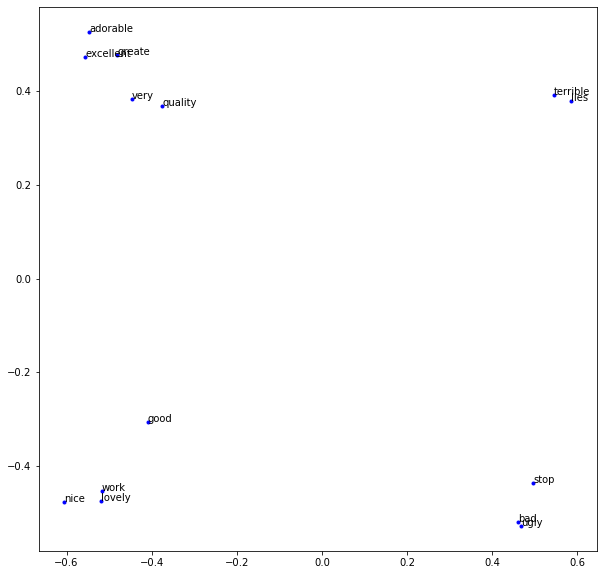

In [343]:
import matplotlib.pyplot as plt

embd_matrix = embd.get_weights()[0]
print(embd_matrix)
plt.figure(figsize=(10,10))  
for idx, (x1, x2) in enumerate(embd_matrix):
    if idx == 0 : continue
    plt.plot(x1, x2, 'b.')
    plt.annotate(t.index_word[idx], (x1,x2 ))

### Embeding Layer를 이용한 IMDB 텍스트 분류 실습


#### 데이타 준비

In [1]:
import tensorflow as tf

imdb = tf.keras.datasets.imdb

voca_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=voca_size)
print(f'train set : {len(X_train)}, test set: {len(X_test), }, classes : {max(y_train)+1}')

train set : 25000, test set: (25000,), classes : 2


#### 단어-인덱스 사전 생성

In [2]:
imdb_word_index = imdb.get_word_index()
imdb_index_word = { idx : key for key, idx in imdb_word_index.items()}

print(imdb_index_word[1], imdb_word_index['the'])

the 1


#### 데이타 미리보기

In [9]:
print(X_train[0][:20])

# 0:pad, 1:<start>, 2:UNK 
' '.join([imdb_index_word.get(i-3, '?') for i in X_train[0][:20]])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you"

#### 패딩

In [10]:
#padding
max_len = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

#### 모델 생성, 훈련, 평가

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(voca_size, 250))
model.add(tf.keras.layers.LSTM(120))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

result = model.evaluate(X_test, y_test)
print(f'cost :{result[0]}, accuracy:{result[1] * 100:.2f}%')

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.4619 - acc: 0.7776 - val_loss: 0.4323 - val_acc: 0.7946
Epoch 2/20
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.2810 - acc: 0.8888 - val_loss: 0.3118 - val_acc: 0.8688
Epoch 3/20
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.1878 - acc: 0.9290 - val_loss: 0.3479 - val_acc: 0.8660
Epoch 4/20
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.1432 - acc: 0.9474 - val_loss: 0.4493 - val_acc: 0.8605
Epoch 5/20
25000/25000 [==============================] - 40s 2ms/sample - loss: 0.1142 - acc: 0.9581 - val_loss: 0.3961 - val_acc: 0.8683
Epoch 6/20
25000/25000 [==============================] - 41s 2ms/sample - loss: 0.1072 - acc: 0.9613 - val_loss: 0.4287 - val_acc: 0.8546
Epoch 7/20
25000/25000 [==============================] - 41s 2ms/sample - loss: 0.0674 - acc: 0.9771 - val_loss: 0.